<a href="https://colab.research.google.com/github/dylanoreilly1/final-year/blob/main/Candycrush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving candy_crush.csv to candy_crush.csv


In [22]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from scipy import stats


df=pd.read_csv("candy_crush.csv")
df

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         90189 non-null  int64
 1   gate            90189 non-null  int64
 2   gamerounds_sum  90189 non-null  int64
 3   retention_day   90189 non-null  bool 
 4   retention_week  90189 non-null  bool 
dtypes: bool(2), int64(3)
memory usage: 2.2 MB


In [24]:
df.describe()

,user_id,gate,gamerounds_sum
count,9.018900e+04,90189.000000,90189.000000
mean,4.998412e+06,40.087483,51.872457
std,2.883286e+06,9.999673,195.050858
min,1.160000e+02,30.000000,0.000000
25%,2.512230e+06,30.000000,5.000000
50%,4.995815e+06,50.000000,16.000000
75%,7.496452e+06,50.000000,51.000000
max,9.999861e+06,50.000000,49854.000000


In [25]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ["gate"]]
target = "gate"
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(90189, 4)
(90189,)


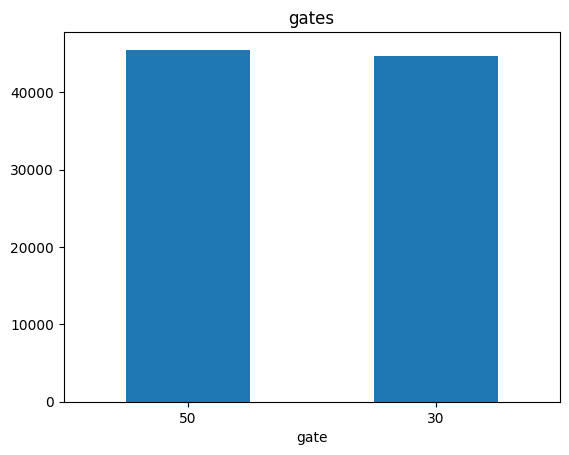

In [26]:
Count_classes = pd.value_counts(df['gate'], sort = True)
Count_classes.plot(kind = 'bar', rot=0)
plt.title("gates")
plt.xlabel("gate")
plt.ylabel = ("frequency")

In [27]:
print(df.isna().sum())

user_id           0
gate              0
gamerounds_sum    0
retention_day     0
retention_week    0
dtype: int64


In [28]:
import pandas as pd
from scipy.stats import ttest_ind

group_a_1day_retention = df[df['gate'] == 30]['retention_day'].mean()
group_b_1day_retention = df[df['gate'] == 50]['retention_day'].mean()

t_statistic, p_value = ttest_ind(df[df['gate'] == 30]['retention_day'], df[df['gate'] == 50]['retention_day'])

print(f"Group A one-day retention rate: {group_a_1day_retention:.2%}")
print(f"Group B one-day retention rate: {group_b_1day_retention:.2%}")
print(f"p-value: {p_value:.4f}")

Group A one-day retention rate: 44.82%
Group B one-day retention rate: 44.23%
p-value: 0.0744


In [29]:
import pandas as pd
from scipy.stats import ttest_ind

group_a_retention = df.loc[df['gate'] == 30, 'retention_week'].mean()
group_b_retention = df.loc[df['gate'] == 50, 'retention_week'].dropna().mean()

p_value = stats.ttest_ind(df.loc[df['gate'] == 30, 'retention_week'].dropna(),
                          df.loc[df['gate'] == 50, 'retention_week'].dropna())[1]

print(f"Group A one-week retention rate: {group_a_retention:.2%}")
print(f"Group B one-week retention rate: {group_b_retention:.2%}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
    if group_b_retention > group_a_retention:
        print("Moving the gate from level 30 to 50 would likely increase retention.")
    else:
        print("Moving the gate from level 30 to 50 would likely decrease retention.")
else:
    print("There is not a significant difference between the two groups.")


Group A one-week retention rate: 19.02%
Group B one-week retention rate: 18.20%
p-value: 0.0016
There is a significant difference between the two groups.
Moving the gate from level 30 to 50 would likely decrease retention.


In [30]:
import pandas as pd
from scipy.stats import ttest_ind


group_a_purchases = df.loc[df['gate'] == 30, 'gamerounds_sum'][df.loc[df['gate'] == 30, 'gamerounds_sum'] > 0].count() / df.loc[df['gate'] == 30].shape[0]
group_b_purchases = df.loc[df['gate'] == 50, 'gamerounds_sum'][df.loc[df['gate'] == 50, 'gamerounds_sum'] > 0].count() / df.loc[df['gate'] == 50].shape[0]

p_value = stats.ttest_ind(df.loc[df['gate'] == 30, 'gamerounds_sum'][df.loc[df['gate'] == 30, 'gamerounds_sum'] > 0],
                          df.loc[df['gate'] == 50, 'gamerounds_sum'][df.loc[df['gate'] == 50, 'gamerounds_sum'] > 0])[1]


print(f"Group A proportion of players making in-game purchases: {group_a_purchases:.2%}")
print(f"Group B proportion of players making in-game purchases: {group_b_purchases:.2%}")
print(f"p-value: {p_value:.4f}")

Group A proportion of players making in-game purchases: 95.67%
Group B proportion of players making in-game purchases: 95.48%
p-value: 0.4159


In [31]:

df_over_30 = df[df['gamerounds_sum'] >= 30]

total_over_30 = len(df_over_30)

total_players = len(df)
percent_over_30 = (total_over_30 / total_players) * 100
df_over_30 = df[df['gamerounds_sum'] >= 30]

total_over_30 = len(df_over_30)

total_players = len(df)

percent_over_30 = (total_over_30 / total_players) * 100

print(f"{percent_over_30:.2f}% of players played over 30 levels in the first 2 weeks.")

36.89% of players played over 30 levels in the first 2 weeks.


In [32]:

df_over_50 = df[df['gamerounds_sum'] >= 50]

total_over_50 = len(df_over_50)

total_players = len(df)
percent_over_50 = (total_over_50 / total_players) * 100
df_over_50 = df[df['gamerounds_sum'] >= 50]


total_over_50 = len(df_over_50)

total_players = len(df)

percent_over_50 = (total_over_50 / total_players) * 100

print(f"{percent_over_50:.2f}% of players played over 50 levels in the first 2 weeks.")

25.68% of players played over 50 levels in the first 2 weeks.


In [33]:
import pandas as pd


average_games_played = df['gamerounds_sum'].mean()
print(f"Average number of games played: {average_games_played:.2f}")

Average number of games played: 51.87


In [39]:
import pandas as pd


std_dev = df['gamerounds_sum'].std()

median = df['gamerounds_sum'].median()

q1 = df['gamerounds_sum'].quantile(0.25)
q2 = df['gamerounds_sum'].quantile(0.5)
q3 = df['gamerounds_sum'].quantile(0.75)

print(std_dev)
print(median)
print(q1)
print(q2)
print(q3)

195.05085754200744
16.0
5.0
16.0
51.0
